## Importing Libraries


We'll be using Pandas to read the data, Seaborn and Matplotlib to visualize it, and NumPy for the great utility methods:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset


In [5]:
dataset = pd.read_csv("Maternal_health_risk.csv")

In [7]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## Visualizing the Data

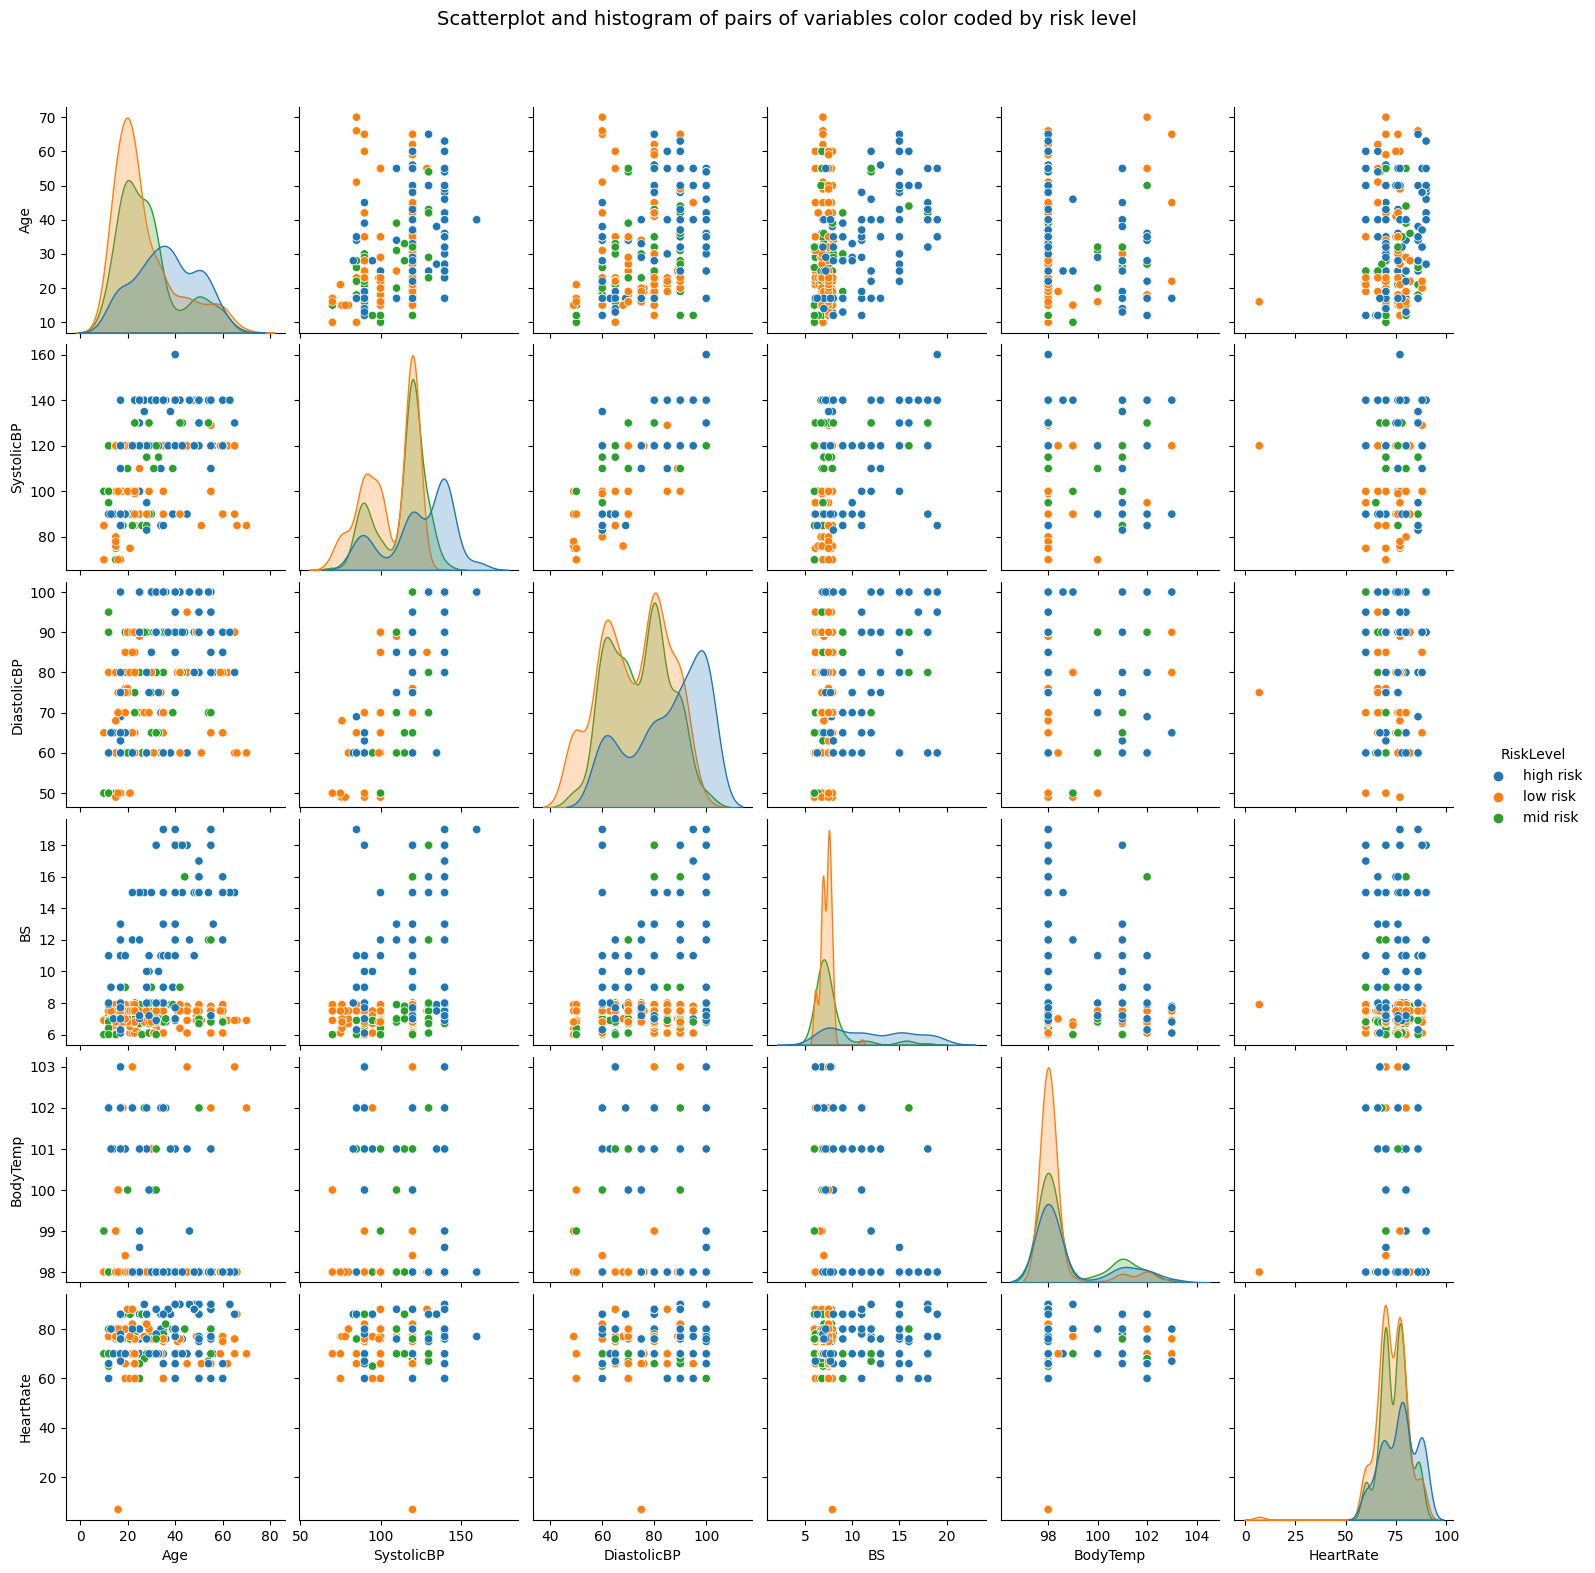

In [8]:
g = sns.pairplot(dataset, hue='RiskLevel')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 14, # defining the size of the title
               y=1.05); # y = defining title y position (height)

## Data Preprocessing for Classification

In [10]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [11]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)

In [12]:
y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [15]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


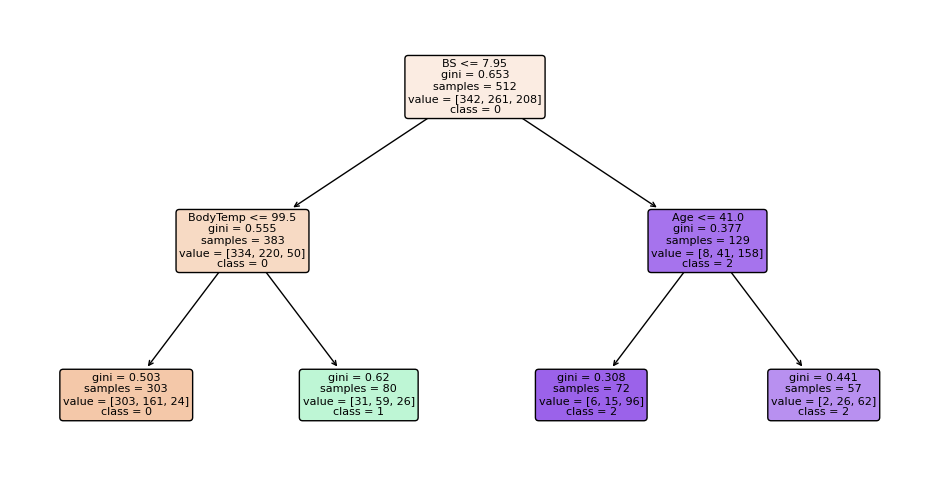

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


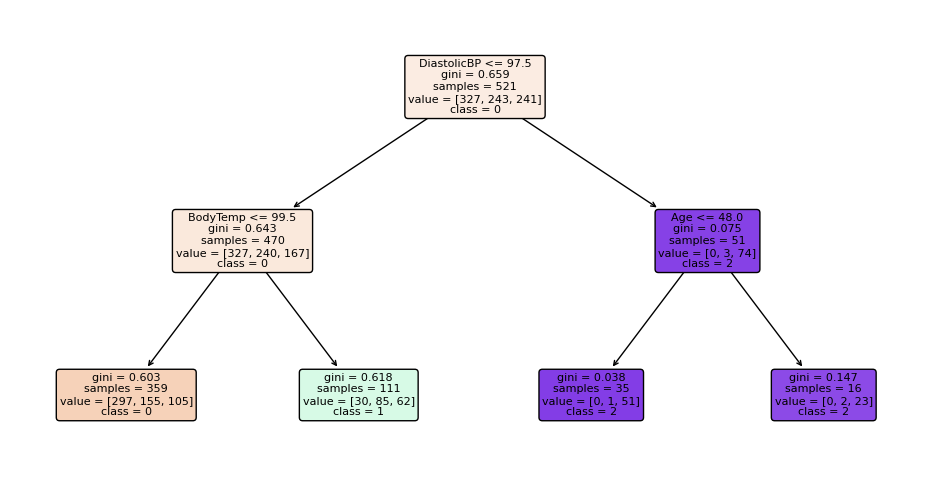

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


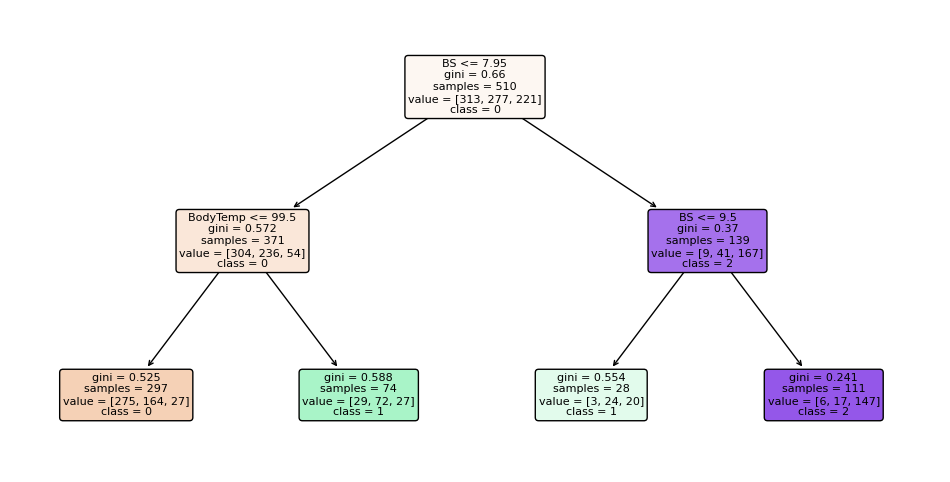

In [16]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

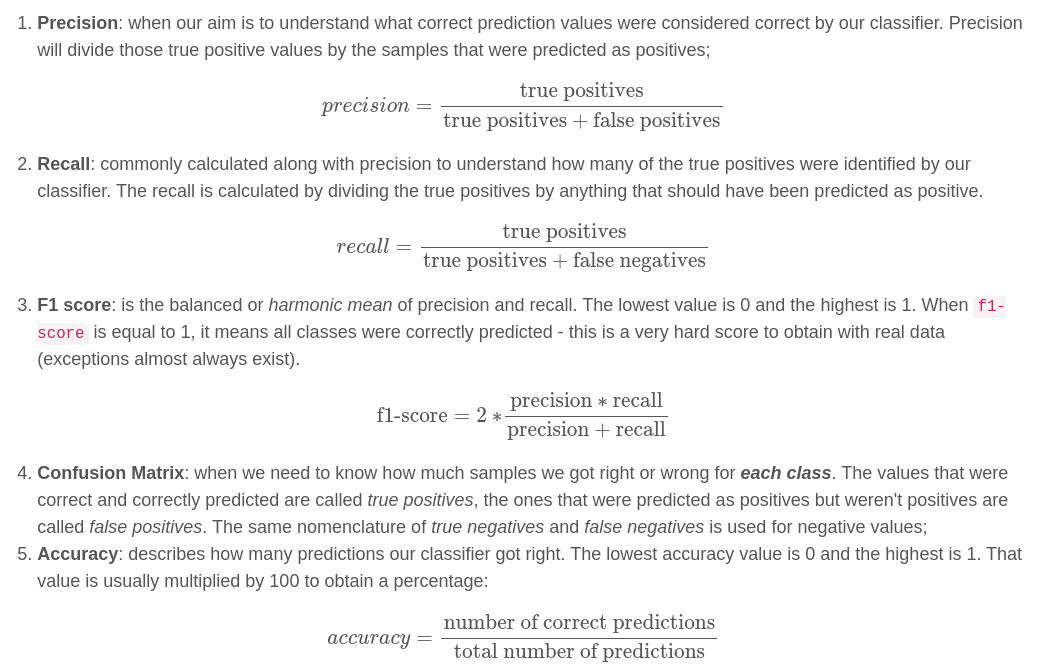

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



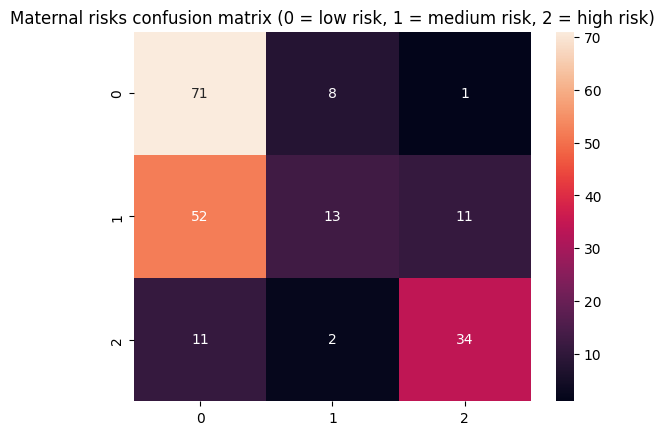

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

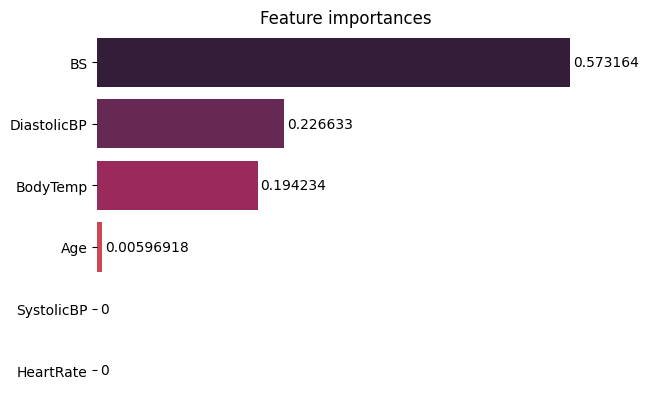

In [18]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [19]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.75      0.58      0.65        76
           2       0.90      0.81      0.85        47

    accuracy                           0.74       203
   macro avg       0.78      0.75      0.75       203
weighted avg       0.76      0.74      0.74       203



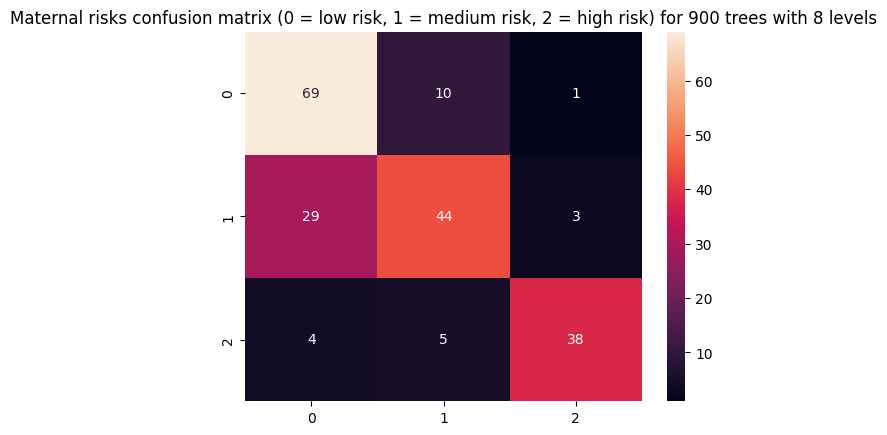

In [20]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))

This shows how adding more trees, and more specialized trees (higher levels), has improved our metrics. We still have a low recall for class 1, but the accuracy is now 74%. The F1-score when classifying high risk cases is 0.85, which means high risk cases are now more easily identified when compared to 0.73 in the previous model!

In a day-to-day project, it might be more important to identify high risk cases, for instance with a metric similar to precision, which is also known as sensitivity in statistics. Try tweaking some of the model parameters and observe the results.

Up to now, we have obtained an overall understanding of how Random Forest can be used for classifying data - in the next section, we can use the same dataset in a different way to see how the same model predicts values with regression.

# Referencia


https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/